In [8]:
%autosave 50

Autosaving every 50 seconds


## Load Basic Liberaries

In [1]:
import os
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json 

## Load the pre-trained model
- this model.json, model.h5 is meant for dog/cat classifier with around 85 % accuracy

In [2]:
## Example model.json and model.h5 could be found here: 
## /Users/psaxena/Documents/work_mode/ml_in_produdction/model
with open("/Users/psaxena/Documents/work_mode/ml_in_produdction/dog_cat_classifier/model/model.json",'r') as f:
    json = f.read()
loaded_model=model_from_json(json)
loaded_model.load_weights("/Users/psaxena/Documents/work_mode/ml_in_produdction/dog_cat_classifier/model/model.h5")
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded model from disk


2021-09-30 09:21:06.089690: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load image

In [3]:
def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

## Predict image

In [4]:
def predict_new_image(model_name, image_name):
    
    # image path
    #img_path = 'test_images/' + image_name
    img_dir = "/Users/psaxena/Documents/weitebildung/tensorflow-developer-zertificate-coursera/course2_convolutional-neural-networks-tensorflow/09_working_application/test_images/"
    img_path= img_dir+image_name
    if not os.path.exists(img_path):
        logger.error(f"{img_path} does not exist")
        return
    
    # load a single image
    new_image = load_image(img_path, show=True)
    pred = model_name.predict(new_image)
    
    if pred[0]>0.5:
        print(pred[0], " is a dog")    
    else:
        print(pred[0], " is a cat")

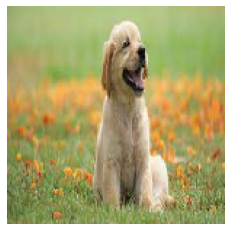

[0.99711263]  is a dog


2021-09-30 09:21:14.771767: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [6]:
predict_new_image(model_name=loaded_model, image_name="dog_02.jpeg")